# MODEL CREATION FOR AGE AND GENDER DETECTION - 

problem statement - BOSCH's age and gender detection

dataset used - UTKFace dataset

### Importing Libraries - 

In [18]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import random
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Rescaling
from tensorflow.keras.optimizers import Adam, SGD
from mtcnn import MTCNN
from PIL import Image

### forming dataset - 

In [4]:
folder = 'E:\coding\\test_python\inter IIT Bosch face detection (5-3-2022)\\akash\'s work\\face_recog\\train_faces' #local folder

paths = [folder + '\\' + i for i in os.listdir(folder)]
random.shuffle(paths)

ygender = []
yage = []

upperlimit = 5000
paths = paths[0:upperlimit]

images = np.array([np.array(Image.open(img).convert('RGB').resize((256,256), Image.ANTIALIAS)) for img in paths])

for i in paths:
    ygender.append(int(i.split('\\')[-1].split('_')[1]))
    yage.append(int(i.split('\\')[-1].split('_')[0]))

ygender = pd.DataFrame(ygender)
yage = np.array(yage)

In [5]:
len(images), ygender.shape, yage.shape

(5000, (5000, 1), (5000,))

In [6]:
ygender = ygender.replace({1:'F', 0:'M'})
ygender = pd.get_dummies(ygender)
ygender.head()

,0_F,0_M
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


### testing random image - 

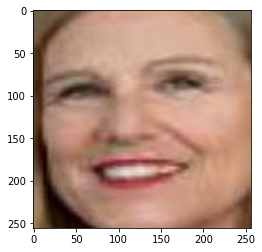

In [7]:
plt.imshow(images[0])

### Model training - 

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, ygender)

In [19]:
gender_model = Sequential()

gender_model.add(Rescaling(1./255))
gender_model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(256,256,3)))
gender_model.add(MaxPool2D(strides=2))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(32, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(strides=2))
gender_model.add(BatchNormalization())

gender_model.add(Conv2D(64, kernel_size=3, activation='relu'))
gender_model.add(MaxPool2D(strides=2))
gender_model.add(BatchNormalization())

gender_model.add(Flatten())
gender_model.add(Dense(100, activation='relu'))

gender_model.add(Dense(2, activation='relu', name='gender'))
gender_model.compile(optimizer=Adam(learning_rate=0.001), loss='MAE', metrics=['accuracy', 'mae'])
gender_model.fit(X_train, Y_train, epochs=15, batch_size=1, validation_data=(X_test, Y_test), verbose=1)

In [ ]:
tf.keras.utils.plot_model(gender_model, show_shapes=True)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(images, yage)

In [ ]:
age_model = Sequential()

age_model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(256,256,3)))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(32, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))
              
age_model.add(Conv2D(64, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(strides=2))

age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(strides=2))

age_model.add(Flatten())
age_model.add(Dense(100, activation='relu'))
age_model.add(Dense(100, activation='relu'))

age_model.add(Dense(1, activation='relu', name='gender'))
age_model.compile(optimizer=Adam(learning_rate=0.0001), loss=tf.keras.losses.MAE, metrics=['accuracy', 'mae'])
age_model.fit(X_train, Y_train, epochs=15, batch_size=5, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/15
750/750 [==============================] - 14s 17ms/step - loss: 32.9152 - accuracy: 0.0000e+00 - mae: 32.9152 - val_loss: 32.7360 - val_accuracy: 0.0000e+00 - val_mae: 32.7360
Epoch 2/15
750/750 [==============================] - 12s 17ms/step - loss: 32.9152 - accuracy: 0.0000e+00 - mae: 32.9152 - val_loss: 32.7360 - val_accuracy: 0.0000e+00 - val_mae: 32.7360
Epoch 3/15
750/750 [==============================] - 12s 17ms/step - loss: 32.9152 - accuracy: 0.0000e+00 - mae: 32.9152 - val_loss: 32.7360 - val_accuracy: 0.0000e+00 - val_mae: 32.7360
Epoch 4/15
750/750 [==============================] - 12s 17ms/step - loss: 32.9152 - accuracy: 0.0000e+00 - mae: 32.9152 - val_loss: 32.7360 - val_accuracy: 0.0000e+00 - val_mae: 32.7360
Epoch 5/15
153/750 [=====>........................] - ETA: 8s - loss: 32.8693 - accuracy: 0.0000e+00 - mae: 32.8693

KeyboardInterrupt: 

In [ ]:
tf.keras.utils.plot_model(age_model, show_shapes=True)

### Saving models - 

In [ ]:
age_model.save('Age_model')
gender_model.save('Gender_model')